In [3]:
import tweepy
import configparser
import pandas as pd
import re
import itertools as iter
import collections
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = 'sIBjK23hz7SJdZBFiPrV9Z7tQ'
api_key_secret = 'iuCl2PXg0UoOxeU1AVzafQIGQ33uekgelwxVFfWUxeZDYQ1YpB'

access_token = '2417601639-sjTIQhgHkMPnLNWt6cSOzIRZOggS1ZyalSWh91L'
access_token_secret = 'swTQsWo9tD3Zk7jA6DtMkkw3sibNc8WESN7wqXmOqPifP'

In [5]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
columns = ['Time', 'ID', 'User','Name','User Status Count', 'Tweet', 'Favorite','Retweets Count','Device']
data = []
key='saham'

for tweet in tweepy.Cursor(api.search, q=key, lang="en").items(500):
    
    data.append([tweet.created_at, tweet.id, tweet.user.screen_name, tweet.user.name, tweet.user.statuses_count, tweet.text, 
                 tweet.favorite_count, tweet.retweet_count,  tweet.source])

df = pd.DataFrame(data, columns = columns)
print(df)

                   Time                   ID             User  \
0   2022-03-28 09:37:49  1508377813950210048          hlmshkr   
1   2022-03-28 09:28:52  1508375558874288134      SatrioAkira   
2   2022-03-28 08:56:46  1508367480485720068         KiwoomID   
3   2022-03-28 08:15:33  1508357111482241028      SatrioAkira   
4   2022-03-28 07:41:30  1508348540787249154         bellaokt   
..                  ...                  ...              ...   
495 2022-03-22 03:02:45  1506104065495027715       Mani981230   
496 2022-03-22 03:01:43  1506103803111636994       Saham_fess   
497 2022-03-22 03:01:01  1506103629178019841  RajuAku14865042   
498 2022-03-22 02:56:42  1506102539887947777    bayuwicakcana   
499 2022-03-22 02:55:23  1506102207954886658    SaiPawanist13   

                                       Name  User Status Count  \
0                                 Mindscape               3915   
1    DM or Join Tele. Satrio Akira Hantanto                721   
2                Kiwo

In [7]:
df.to_csv('119140026-RA.csv')

In [8]:
pd.DataFrame(df)

,Time,ID,User,Name,User Status Count,Tweet,Favorite,Retweets Count,Device
0,2022-03-28 09:37:49,1508377813950210048,hlmshkr,Mindscape,3915,next coding project Screener saham with @_ifza...,0,0,Twitter for iPhone
1,2022-03-28 09:28:52,1508375558874288134,SatrioAkira,DM or Join Tele. Satrio Akira Hantanto,721,@Saham_fess Hold,0,0,Twitter for Android
2,2022-03-28 08:56:46,1508367480485720068,KiwoomID,Kiwoom Sekuritas Indonesia,21488,Closing II 28 Maret 2022 #kiwoomsekuritas #sa...,0,0,Twitter Web App
3,2022-03-28 08:15:33,1508357111482241028,SatrioAkira,DM or Join Tele. Satrio Akira Hantanto,721,@Saham_fess Hold,0,0,Twitter for Android
4,2022-03-28 07:41:30,1508348540787249154,bellaokt,JUAL FROZEN FOOD,64796,@Saham_fess Happy Cuanki😗,0,0,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...
495,2022-03-22 03:02:45,1506104065495027715,Mani981230,MaNIkanTA,62903,RT @PKadmirer03: Ippudu ok kadhamma never try ...,0,197,Twitter for Android
496,2022-03-22 03:01:43,1506103803111636994,Saham_fess,Sahamfess 📈,32136,bike hold? shm!,0,0,Saham fess 📈
497,2022-03-22 03:01:01,1506103629178019841,RajuAku14865042,Raju Akula,4252,RT @PKadmirer03: Ippudu ok kadhamma never try ...,0,197,Twitter for Android
498,2022-03-22 02:56:42,1506102539887947777,bayuwicakcana,saya ini,3104,@Saham_fess Bbca,0,0,Twitter for Android


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               500 non-null    datetime64[ns]
 1   ID                 500 non-null    int64         
 2   User               500 non-null    object        
 3   Name               500 non-null    object        
 4   User Status Count  500 non-null    int64         
 5   Tweet              500 non-null    object        
 6   Favorite           500 non-null    int64         
 7   Retweets Count     500 non-null    int64         
 8   Device             500 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 35.3+ KB


In [10]:
list_tweet = tweepy.Cursor(api.search,
                           q=key,lang='en').items(1000)

all_tweet = [tweet.text for tweet in list_tweet]
all_tweet [:10]

['next coding project Screener saham with @_ifzat , then a long term indie game and a home automation solution.  Exciting plan ahead',
 '@Saham_fess Hold',
 'Closing II 28 Maret 2022  #kiwoomsekuritas #saham #hero #stockmarkets #ihsg https://t.co/Rzu2JFj24Y',
 '@Saham_fess Hold',
 '@Saham_fess Happy Cuanki😗',
 'in coal we trust shm! 🥺 https://t.co/T8IG7oJmZz',
 '@AbamSaham Noted Abam Saham✍️',
 '@Saham_fess Congrats!👍',
 'RT @Covel: That’s volatility. https://t.co/y6zWbLyWbO',
 '@Saham_fess stockbit, siminvest']

In [11]:
def remove(txt):
  return re.sub("[^0-9A-za-z \t]|(\w+:\/\/\S+)","",txt)

tweet_remove_url = [remove(list_tweet) for list_tweet in all_tweet]
tweet_remove_url[:10]

['next coding project Screener saham with _ifzat  then a long term indie game and a home automation solution  Exciting plan ahead',
 'Saham_fess Hold',
 'Closing II 28 Maret 2022  kiwoomsekuritas saham hero stockmarkets ihsg ',
 'Saham_fess Hold',
 'Saham_fess Happy Cuanki',
 'in coal we trust shm  ',
 'AbamSaham Noted Abam Saham',
 'Saham_fess Congrats',
 'RT Covel Thats volatility ',
 'Saham_fess stockbit siminvest']

In [12]:
word_in_tweet = [list_tweet.lower().split() for list_tweet in tweet_remove_url]
word_in_tweet[:1]

[['next',
  'coding',
  'project',
  'screener',
  'saham',
  'with',
  '_ifzat',
  'then',
  'a',
  'long',
  'term',
  'indie',
  'game',
  'and',
  'a',
  'home',
  'automation',
  'solution',
  'exciting',
  'plan',
  'ahead']]

In [13]:
list_tweet_no_url = list(iter.chain(*word_in_tweet))
count_word_list_tweet = collections.Counter(list_tweet_no_url)
count_word_list_tweet.most_common(25)

[('saham', 428),
 ('rt', 321),
 ('to', 315),
 ('with', 224),
 ('never', 196),
 ('try', 196),
 ('ke', 194),
 ('ok', 193),
 ('crowd', 193),
 ('ippudu', 192),
 ('kadhamma', 192),
 ('mess', 192),
 ('pawankalyan', 192),
 ('fans', 192),
 ('aa', 192),
 ('pkadmirer03', 191),
 ('saham_fess', 151),
 ('the', 141),
 ('i', 103),
 ('this', 89),
 ('of', 77),
 ('is', 63),
 ('you', 55),
 ('in', 47),
 ('amp', 44)]

In [14]:
clean_list_tweet = pd.DataFrame(count_word_list_tweet.most_common(25), columns = ['Kata','Jumlah'])

clean_list_tweet.head()

,Kata,Jumlah
0,saham,428
1,rt,321
2,to,315
3,with,224
4,never,196


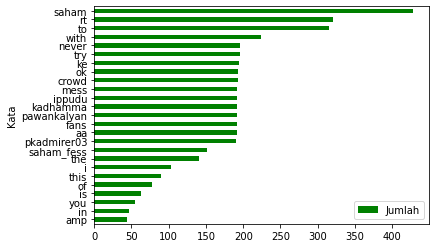

In [15]:
clean_list_tweet.sort_values(by='Jumlah').plot.barh(x='Kata',y='Jumlah',color='green')

In [16]:
a=df['Time']
tanggal=a.dt.strftime('%Y-%m-%d')
b=tanggal.value_counts()
b

2022-03-22    112
2022-03-23     88
2022-03-24     82
2022-03-25     76
2022-03-26     54
2022-03-27     47
2022-03-28     41
Name: Time, dtype: int64

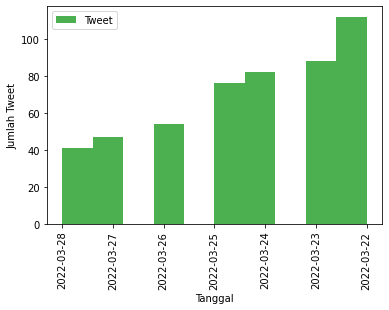

In [17]:
plt.hist(tanggal,color='#4CAF50')
plt.xticks(rotation='vertical')
plt.legend(['Tweet'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet')
plt.show()

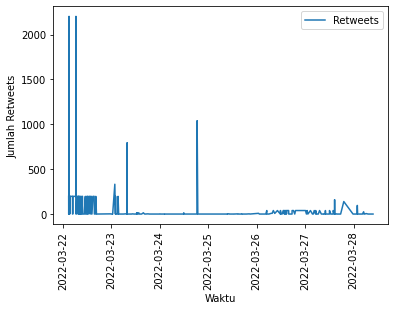

In [18]:
plt.plot(df['Time'],df['Retweets Count'])
plt.xticks(rotation='vertical')
plt.legend(['Retweets'])
plt.xlabel('Waktu')
plt.ylabel('Jumlah Retweets')
plt.show()

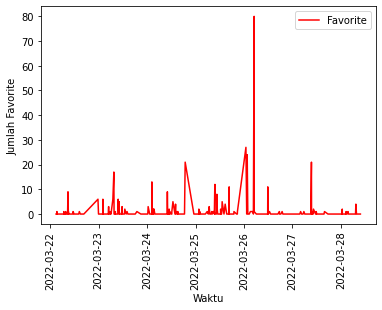

In [19]:
plt.plot(df['Time'],df['Favorite'],color='red')
plt.xticks(rotation='vertical')
plt.legend(['Favorite'])
plt.xlabel('Waktu')
plt.ylabel('Jumlah Favorite')
plt.show()

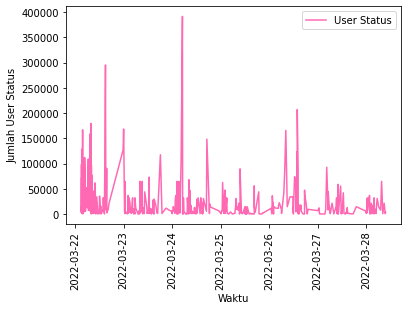

In [20]:
plt.plot(df['Time'],df['User Status Count'],color='hotpink')
plt.xticks(rotation='vertical')
plt.legend(['User Status'])
plt.xlabel('Waktu')
plt.ylabel('Jumlah User Status')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


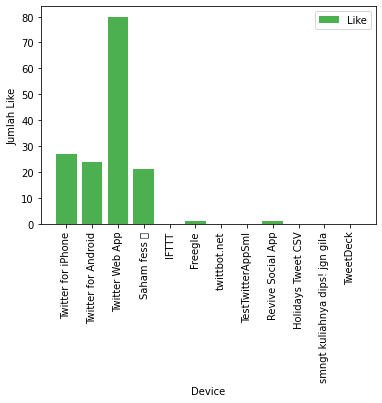

In [21]:
plt.bar(df['Device'],df['Favorite'],color='#4CAF50')
plt.xticks(rotation='vertical')
plt.legend(['Like'])
plt.xlabel('Device')
plt.ylabel('Jumlah Like')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


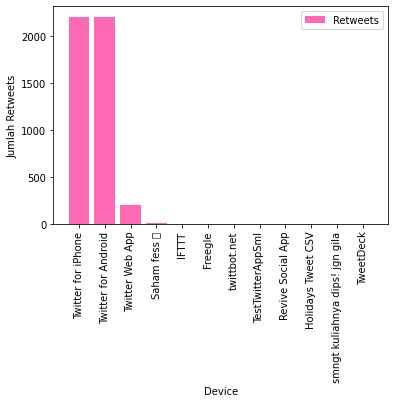

In [22]:
plt.bar(df['Device'],df['Retweets Count'],color='hotpink')
plt.xticks(rotation='vertical')
plt.legend(['Retweets'])
plt.xlabel('Device')
plt.ylabel('Jumlah Retweets')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


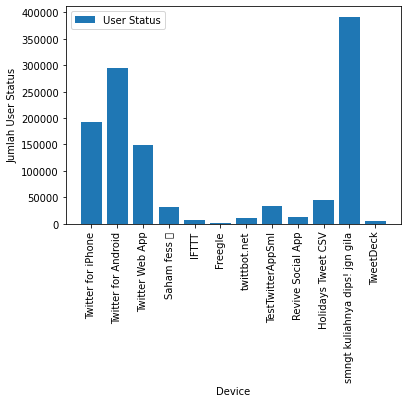

In [23]:
plt.bar(df['Device'],df['User Status Count'])
plt.xticks(rotation='vertical')
plt.legend(['User Status'])
plt.xlabel('Device')
plt.ylabel('Jumlah User Status')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


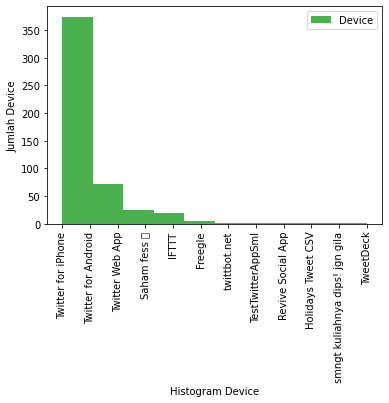

In [24]:
plt.hist(df['Device'],color='#4CAF50')
plt.xticks(rotation='vertical')
plt.legend(['Device'])
plt.xlabel('Histogram Device')
plt.ylabel('Jumlah Device')
plt.show()